# Import Library

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Data Gathering

In [2]:
df=pd.read_csv("D:\Dataset\e_commerce.csv")
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0,0
1,107,415,3717191,no,yes,26,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0,0
2,137,415,3581921,no,no,0,243,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0,0
3,84,408,3759999,yes,no,0,299,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0,0
4,75,415,3306626,yes,no,0,167,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77.0,216,126,279.1,83,12.56,9.9,6,2.67,2.0,0
3329,68,415,3703271,no,no,0,231,39,13,NaN,153,55,191.3,123,8.61,9.6,4,2.59,3.0,0
3330,28,510,3288230,no,no,0,181,31,25,109.0,289,58,191.9,91,8.64,14.1,6,3.81,2.0,0
3331,184,510,3646381,yes,no,0,214,36,14,105.0,160,84,139.2,137,6.26,5.0,10,1.35,2.0,0


# EDA

In [3]:
df.corr()[['churn']]

,churn
account length,0.016541
location code,0.006174
user id,0.005730
add to wishlist,-0.089728
desktop sessions,0.205138
app sessions,0.204683
desktop transactions,0.091811
total product detail views,0.019509
session duration,0.092783
promotion clicks,0.009307


In [4]:
df.drop(['add to wishlist','app transactions'],axis=1,inplace=True)

In [5]:
df

,account length,location code,user id,credit card info save,push status,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,265,45,17,110.0,197,87,244.7,91,11.01,10.0,2.70,1.0,0
1,107,415,3717191,no,yes,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3.70,1.0,0
2,137,415,3581921,no,no,243,41,10,114.0,121,110,162.6,104,7.32,12.2,3.29,0.0,0
3,84,408,3759999,yes,no,299,51,5,71.0,62,88,196.9,89,8.86,6.6,1.78,2.0,0
4,75,415,3306626,yes,no,167,28,13,113.0,148,122,186.9,121,8.41,10.1,2.73,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,156,27,18,77.0,216,126,279.1,83,12.56,9.9,2.67,2.0,0
3329,68,415,3703271,no,no,231,39,13,NaN,153,55,191.3,123,8.61,9.6,2.59,3.0,0
3330,28,510,3288230,no,no,181,31,25,109.0,289,58,191.9,91,8.64,14.1,3.81,2.0,0
3331,184,510,3646381,yes,no,214,36,14,105.0,160,84,139.2,137,6.26,5.0,1.35,2.0,0


In [6]:
df.isna().sum()

account length                          0
location code                           0
user id                                 0
credit card info save                   0
push status                             0
desktop sessions                        0
app sessions                            0
desktop transactions                    0
total product detail views             52
session duration                        0
promotion clicks                        0
avg order value                         0
sale product views                      0
discount rate per visited products      0
product detail view per app session    61
add to cart per session                 0
customer service calls                 59
churn                                   0
dtype: int64

In [7]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

<Axes: >

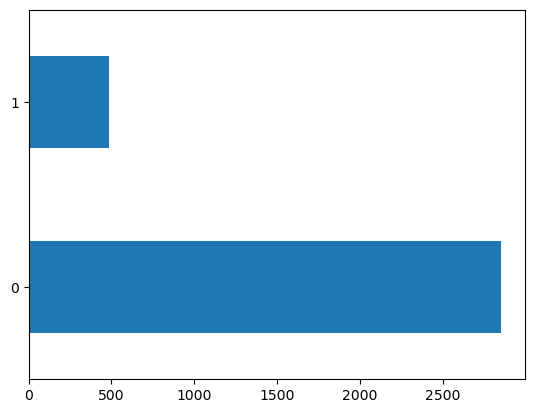

In [8]:
df['churn'].value_counts().plot(kind='barh')

# Define x and y

In [9]:
x=df.drop(['churn'],axis=1)
y=df['churn']

In [10]:
x

,account length,location code,user id,credit card info save,push status,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,add to cart per session,customer service calls
0,128,415,3824657,no,yes,265,45,17,110.0,197,87,244.7,91,11.01,10.0,2.70,1.0
1,107,415,3717191,no,yes,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3.70,1.0
2,137,415,3581921,no,no,243,41,10,114.0,121,110,162.6,104,7.32,12.2,3.29,0.0
3,84,408,3759999,yes,no,299,51,5,71.0,62,88,196.9,89,8.86,6.6,1.78,2.0
4,75,415,3306626,yes,no,167,28,13,113.0,148,122,186.9,121,8.41,10.1,2.73,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,156,27,18,77.0,216,126,279.1,83,12.56,9.9,2.67,2.0
3329,68,415,3703271,no,no,231,39,13,NaN,153,55,191.3,123,8.61,9.6,2.59,3.0
3330,28,510,3288230,no,no,181,31,25,109.0,289,58,191.9,91,8.64,14.1,3.81,2.0
3331,184,510,3646381,yes,no,214,36,14,105.0,160,84,139.2,137,6.26,5.0,1.35,2.0


In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

# Preprocessing

In [12]:
cat=[]
con=[]

for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    
    else:
        con.append(i)

In [13]:
cat

['credit card info save', 'push status']

In [14]:
con

['account length',
 'location code',
 'user id',
 'desktop sessions',
 'app sessions',
 'desktop transactions',
 'total product detail views',
 'session duration',
 'promotion clicks',
 'avg order value',
 'sale product views',
 'discount rate per visited products',
 'product detail view per app session',
 'add to cart per session',
 'customer service calls']

In [15]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])

In [16]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])

In [17]:
x1=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())

In [18]:
x1

,num_pipe__account length,num_pipe__location code,num_pipe__user id,num_pipe__desktop sessions,num_pipe__app sessions,num_pipe__desktop transactions,num_pipe__total product detail views,num_pipe__session duration,num_pipe__promotion clicks,num_pipe__avg order value,num_pipe__sale product views,num_pipe__discount rate per visited products,num_pipe__product detail view per app session,num_pipe__add to cart per session,num_pipe__customer service calls,cat_pipe__credit card info save,cat_pipe__push status
0,0.676489,-0.523603,0.285359,1.564550,1.557193,-0.020265,0.474708,-0.079666,-0.658138,0.866743,-0.465494,0.866029,-0.088435,-0.085690,-0.421808,0.0,1.0
1,0.149065,-0.523603,-0.105965,-0.327130,-0.384977,-0.020265,1.128760,-0.099387,0.145038,1.058571,0.147825,1.059390,1.248892,1.241169,-0.421808,0.0,1.0
2,0.902529,-0.523603,-0.598534,1.160502,1.125600,-1.639456,0.675955,-1.578480,0.496427,-0.756869,0.198935,-0.755571,0.706732,0.697156,-1.187125,0.0,0.0
3,-0.428590,-0.688834,0.049915,2.188988,2.204583,-2.796021,-1.487447,-2.742033,-0.607939,-0.078551,-0.567714,-0.078806,-1.317330,-1.306401,0.343509,1.0,0.0
4,-0.654629,-0.523603,-1.600987,-0.235301,-0.277078,-0.945517,0.625643,-1.046007,1.098809,-0.276311,1.067803,-0.276562,-0.052291,-0.045885,1.108826,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.523603,1.449212,-0.437325,-0.384977,0.211048,-1.185577,0.295038,1.299603,1.547039,-0.874374,1.547188,-0.124579,-0.125496,0.343509,0.0,1.0
3329,-0.830437,-0.523603,-0.156653,0.940112,0.909803,-0.945517,0.021903,-0.947401,-2.264489,-0.189297,1.170023,-0.188670,-0.233011,-0.231645,1.108826,0.0,0.0
3330,-1.835055,1.718817,-1.667974,0.021821,0.046617,1.830239,0.424396,1.734688,-2.113894,-0.177431,-0.465494,-0.175486,1.393468,1.387123,0.343509,0.0,0.0
3331,2.082955,1.718817,-0.363811,0.627893,0.586108,-0.714204,0.223150,-0.809352,-0.808733,-1.219628,1.885562,-1.221396,-1.895634,-1.876950,0.343509,1.0,0.0


# Split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=21)

# Algorithm Evaluation

In [20]:
la=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
sv=SVC()
kn=KNeighborsClassifier()

In [21]:
list1=[la,dt,rf,ab,sv,kn]

In [22]:
for i in list1:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    
    acc=accuracy_score(y_pred,y_test)
    
    f1=round(f1_score(y_pred,y_test),2)
    
    print('*'*50)
    print(i)
    print('Accuracy:',acc)
    print('F1 score:',f1)

**************************************************
LogisticRegression()
Accuracy: 0.8680659670164917
F1 score: 0.35
**************************************************
DecisionTreeClassifier()
Accuracy: 0.8935532233883059
F1 score: 0.66
**************************************************
RandomForestClassifier()
Accuracy: 0.9295352323838081
F1 score: 0.72
**************************************************
AdaBoostClassifier()
Accuracy: 0.8530734632683659
F1 score: 0.37
**************************************************
SVC()
Accuracy: 0.8920539730134932
F1 score: 0.5
**************************************************
KNeighborsClassifier()
Accuracy: 0.8680659670164917
F1 score: 0.33


# Final Selection Random Forest Classifier

In [23]:
grid={
    'n_estimators': range(1,100),
    'criterion':['gini','entropy'],
    'max_depth': range(1,100),
    'min_samples_split': range(1,5),
    'min_samples_leaf': range(1,5),
}

In [24]:
rs=RandomizedSearchCV(rf,param_distributions=grid,cv=3)

In [25]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 100),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 5),
                                        'n_estimators': range(1, 100)})

In [26]:
rs.best_params_

{'n_estimators': 41,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 98,
 'criterion': 'gini'}

In [27]:
best_rf=rs.best_estimator_

In [28]:
best_rf

RandomForestClassifier(max_depth=98, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=41)

# Evaluation of Training Data

In [29]:
y_pred_train=best_rf.predict(x_train)

print('*'*50)
acc=accuracy_score(y_pred_train,y_train)
print('Accuracy:\n',acc)
print('*'*50)

cnf=confusion_matrix(y_pred_train,y_train)
print('Confusion Matrix:\n',cnf)
print('*'*50)

clf=classification_report(y_pred_train,y_train)
print('Classification Report:\n',clf)


**************************************************
Accuracy:
 0.981245311327832
**************************************************
Confusion Matrix:
 [[2288   50]
 [   0  328]]
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2338
           1       0.87      1.00      0.93       328

    accuracy                           0.98      2666
   macro avg       0.93      0.99      0.96      2666
weighted avg       0.98      0.98      0.98      2666



# Testing Data Evaluation

In [30]:
y_pred=best_rf.predict(x_test)

print('*'*50)
acc1=accuracy_score(y_pred,y_test)
print('Accuracy:\n',acc1)
print('*'*50)

cnf1=confusion_matrix(y_pred,y_test)
print('Confusion Matrix:\n',cnf1)
print('*'*50)

clf1=classification_report(y_pred,y_test)
print('Classification Report:\n',clf1)

**************************************************
Accuracy:
 0.9340329835082459
**************************************************
Confusion Matrix:
 [[558  40]
 [  4  65]]
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       598
           1       0.62      0.94      0.75        69

    accuracy                           0.93       667
   macro avg       0.81      0.94      0.85       667
weighted avg       0.95      0.93      0.94       667



# Unseen Data

In [31]:
df2=pd.read_csv("D:/Dataset/testing_ecommerce.csv")
df2

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
0,116,415,3802929,no,yes,24,233,40,13,90.0,152,94,344.3,82,15.49,10.7,6,2.89,1.0
1,56,415,3895988,no,yes,24,122,21,16,87.0,184,76,266.6,98,12.00,12.7,3,3.43,1.0
2,122,415,4067737,yes,yes,40,216,37,21,80.0,250,90,185.9,99,8.37,12.7,4,3.43,1.0
3,76,510,4218141,no,no,0,166,28,22,94.0,257,80,170.8,114,7.69,10.0,4,2.70,1.0
4,85,510,4042871,no,no,0,183,31,14,111.0,169,98,199.7,97,8.99,9.9,4,2.67,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,408,3312144,no,yes,26,208,35,16,115.0,185,113,177.7,144,8.00,8.1,9,2.19,1.0
996,137,408,3573187,no,no,0,209,36,19,120.0,225,100,221.6,130,9.97,11.1,5,3.00,0.0
997,96,510,4205990,no,no,0,98,17,26,100.0,307,88,182.5,120,8.21,7.6,1,2.05,2.0
998,201,510,3738900,no,no,0,213,36,19,72.0,225,90,195.1,99,8.78,7.0,6,1.89,1.0


In [32]:
x_samp=pd.DataFrame(pre.transform(df2),columns=pre.get_feature_names_out())
x_samp

,num_pipe__account length,num_pipe__location code,num_pipe__user id,num_pipe__desktop sessions,num_pipe__app sessions,num_pipe__desktop transactions,num_pipe__total product detail views,num_pipe__session duration,num_pipe__promotion clicks,num_pipe__avg order value,num_pipe__sale product views,num_pipe__discount rate per visited products,num_pipe__product detail view per app session,num_pipe__add to cart per session,num_pipe__customer service calls,cat_pipe__credit card info save,cat_pipe__push status
0,0.375104,-0.523603,0.206239,0.976844,1.017702,-0.945517,-0.531526,-0.967122,-0.306748,2.836436,-0.925484,2.834799,0.164573,0.166413,-0.421808,0.0,1.0
1,-1.131823,-0.523603,0.545102,-1.061763,-1.032366,-0.251578,-0.682461,-0.336042,-1.210321,1.299838,-0.107725,1.301092,0.887452,0.882917,-0.421808,0.0,1.0
2,0.525797,-0.523603,1.170505,0.664625,0.694007,0.904987,-1.034642,0.965560,-0.507542,-0.296087,-0.056615,-0.294140,0.887452,0.882917,-0.421808,1.0,1.0
3,-0.629514,1.718817,1.718183,-0.253667,-0.277078,1.136300,-0.330279,1.103608,-1.009527,-0.594706,0.710034,-0.592971,-0.088435,-0.085690,-0.421808,0.0,0.0
4,-0.403475,1.718817,1.079959,0.058552,0.046617,-0.714204,0.525020,-0.631861,-0.105954,-0.023178,-0.158835,-0.021676,-0.124579,-0.125496,1.874143,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.513172,-0.688834,-1.580894,0.517698,0.478210,-0.251578,0.726266,-0.316321,0.647023,-0.458251,2.243331,-0.456739,-0.775171,-0.762389,-0.421808,0.0,1.0
996,0.902529,-0.688834,-0.630338,0.536064,0.586108,0.442361,0.977825,0.472529,-0.005558,0.409917,1.527792,0.408992,0.309149,0.312367,-1.187125,0.0,0.0
997,-0.127205,1.718817,1.673936,-1.502542,-1.463960,2.061552,-0.028409,2.089670,-0.607939,-0.363326,1.016693,-0.364453,-0.955890,-0.948149,0.343509,0.0,0.0
998,2.509917,1.718817,-0.026914,0.609527,0.586108,0.442361,-1.437136,0.472529,-0.507542,-0.114148,-0.056615,-0.113962,-1.172754,-1.160446,-0.421808,0.0,0.0


In [33]:
y_pred1=best_rf.predict(x_samp)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [34]:
e_commerce=df2[['user id','location code']]
e_commerce

,user id,location code
0,3802929,415
1,3895988,415
2,4067737,415
3,4218141,510
4,4042871,510
...,...,...
995,3312144,408
996,3573187,408
997,4205990,510
998,3738900,510


In [35]:
e_commerce['Prediction']=y_pred1

In [36]:
e_commerce

,user id,location code,Prediction
0,3802929,415,0
1,3895988,415,0
2,4067737,415,0
3,4218141,510,0
4,4042871,510,0
...,...,...,...
995,3312144,408,0
996,3573187,408,0
997,4205990,510,0
998,3738900,510,0


In [37]:
e_commerce['Prediction'].value_counts()

0    881
1    119
Name: Prediction, dtype: int64

<Axes: >

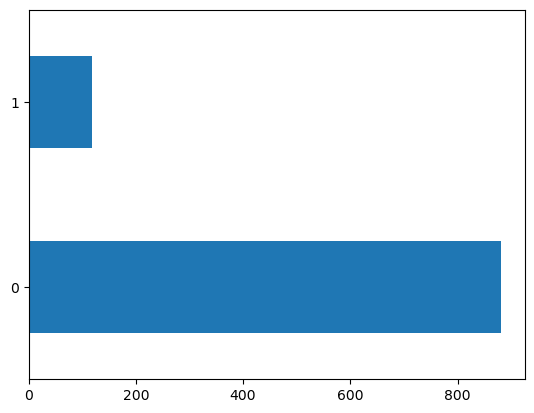

In [38]:
e_commerce['Prediction'].value_counts().plot(kind='barh')

In [39]:
e_commerce.to_csv('predict_e_commerce.csv',index=False)